In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

from xgboost import XGBClassifier

In [2]:
#intervening fit
i_c = pd.read_csv("busyfit_intervening.txt", sep='\t')
#intervening fit without nan or inf or -inf
i_c_2 = i_c.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

#getting all the file names which have nan or inf or -inf
all_i = i_c.merge(i_c_2.drop_duplicates(), on = ['Filename'], how='left', indicator=True)
intervening_non_fit = all_i[all_i['_merge'] == 'left_only']
# for i in intervening_non_fit['Filename'].tolist():
#     print(i)

#associated fit
a_c = pd.read_csv("busyfit_associated_corrected.txt", sep='\t')
#associated fit without nan or inf or -inf
a_c_2 = a_c.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

all_a = a_c.merge(a_c_2.drop_duplicates(), on = ['Filename'], how='left', indicator=True)
associated_non_fit_c = all_a[all_a['_merge'] == 'left_only']
# for i in associated_non_fit_c['Filename'].tolist():
#     print(i)

#adding coloumn int or ass to all fits
i_c_2['Class'] = '1'
a_c_2['Class'] = '0'

i_c_2.reset_index(drop=True, inplace=True)
a_c_2.reset_index(drop=True, inplace=True)

tot_fit = pd.concat([a_c_2, i_c_2])
tot_fit

,Filename,Success,Nchan,dof,chi^2,chi^2/dof,rms,A,dA,B_1,...,dX,W_50,dW_50,W_20,dW_20,F_peak,dF_peak,F_int,dF_int,Class
0,0003+380_ak18.DAT,0,42,37,6.310980e+06,170567.000000,0.01,3.794890e+01,2.029680e+01,0.156570,...,0.000000e+00,0.0000,0.000000e+00,0.0000,0.000000e+00,29.896900,5.351460e-03,0.000000,0.000000e+00,0
1,0035+22_omd+17.DAT,0,57,49,1.092020e+00,0.022286,0.01,4.570920e-03,8.113850e-01,3.539630,...,4.894520e+04,168.5370,2.494620e+05,183.4300,8.668590e+04,0.012289,3.137770e-01,1.455610,7.048980e+02,0
2,0941-08_omd+17.DAT,2,63,58,9.084350e+01,1.566270,0.01,4.636150e-02,5.130390e-03,0.376950,...,3.748890e+17,273.1180,9.999680e+17,319.8790,9.051050e+17,0.046361,5.979700e+04,12.679100,3.345540e+16,0
3,101301.DAT,0,154,149,3.230620e+06,21682.000000,0.01,4.579690e+00,1.953440e-01,5.701480,...,1.160430e+09,674.3710,1.528690e+09,702.0690,1.320860e+09,4.579690,1.326630e-03,3088.790000,1.071930e+10,0
4,1045+35A_adi.DAT,1,157,152,1.209680e+07,79583.900000,0.01,1.723550e+03,1.765720e+04,0.006886,...,0.000000e+00,0.0000,0.000000e+00,0.0000,0.000000e+00,16.346800,2.894770e-03,0.000000,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,SPEC_J1438d.DAT,0,505,500,1.412480e+01,0.028250,0.01,1.323280e-02,1.296320e-02,0.237052,...,3.900340e+00,18.4012,9.840200e+00,25.9958,1.052260e+01,0.012522,5.776920e-03,0.235370,8.686460e-02,1
44,SPEC_J1443.DAT,1,512,507,5.611800e+00,0.011069,0.01,9.546120e+08,2.517170e+12,0.082519,...,1.533250e+00,8.8789,7.662810e+00,14.0158,9.310070e+01,0.046497,1.050480e-01,0.454052,6.177870e-01,1
45,SPEC_J1551.DAT,0,511,503,8.732810e+00,0.017361,0.01,1.016100e-01,1.258670e+13,3.246860,...,1.441940e+12,72.9568,2.141280e+15,122.4800,4.839690e+15,0.066411,5.235680e+11,0.800432,3.985470e+11,1
46,SPEC_J1639.DAT,0,512,504,1.803290e+02,0.357795,0.01,1.124310e-01,3.582340e-01,0.126561,...,4.944160e-01,23.8519,1.165040e+00,32.6225,1.316030e+00,0.077859,4.274530e-03,1.868390,6.815180e-02,1


In [3]:
for i in [7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]:
    print(tot_fit.columns[i])

A
B_1
B_2
C
XE_0
XP_0
W
N
X
W_50
W_20
F_peak
F_int


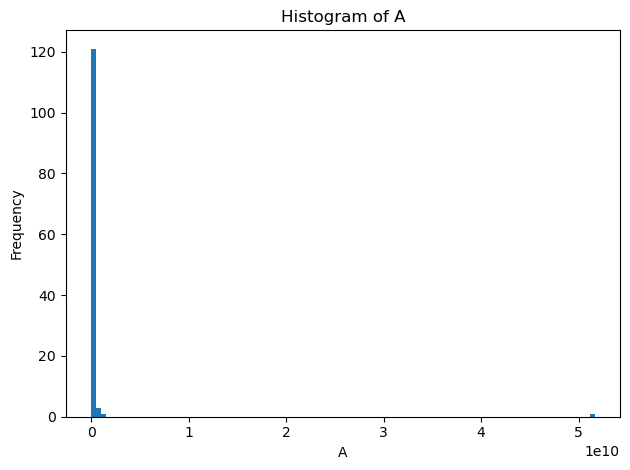

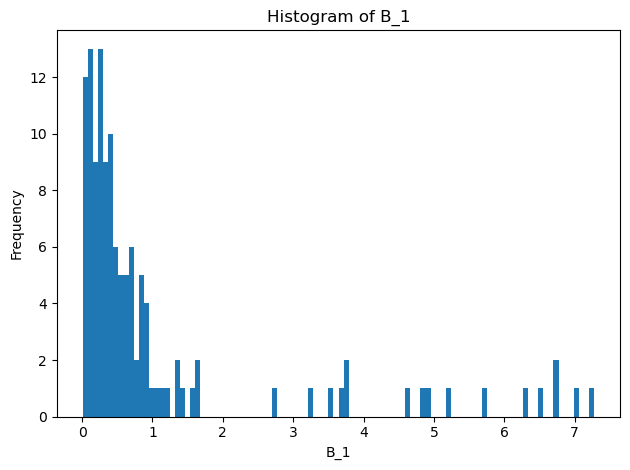

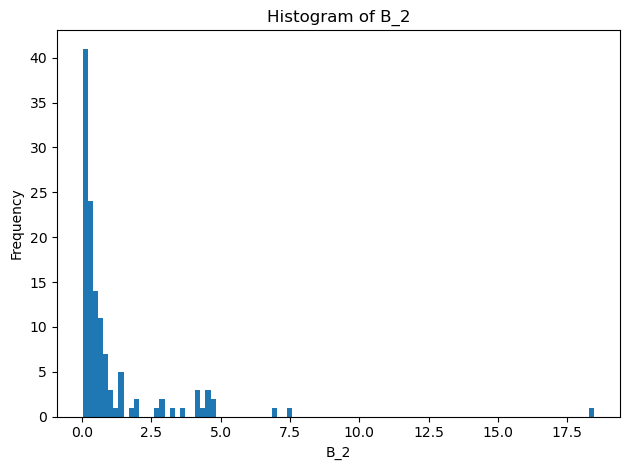

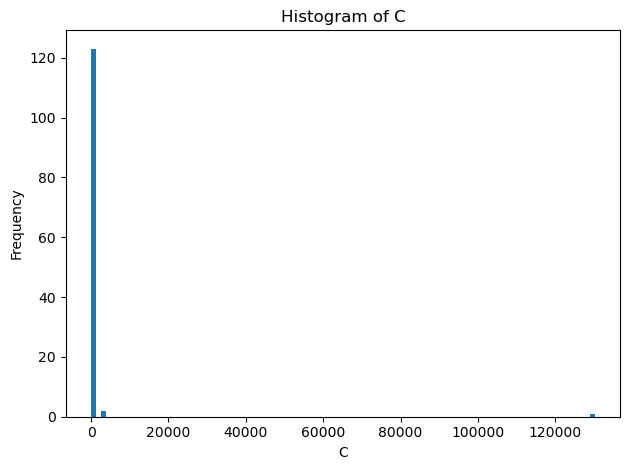

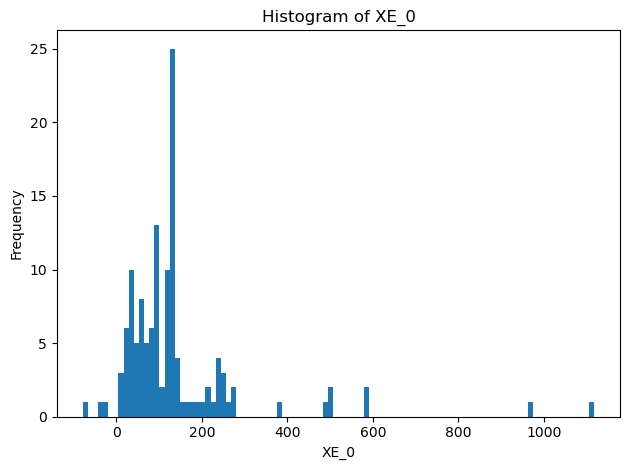

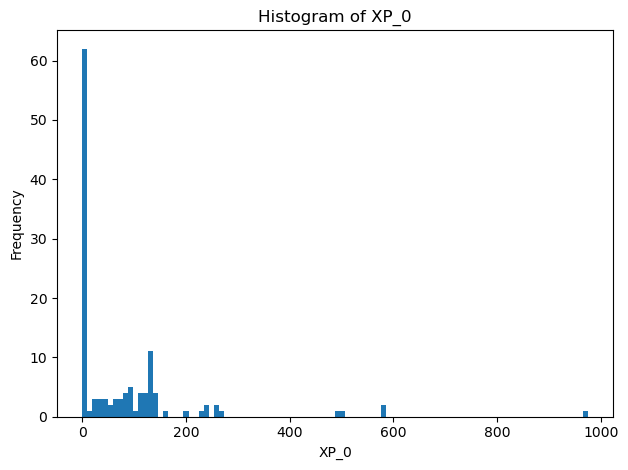

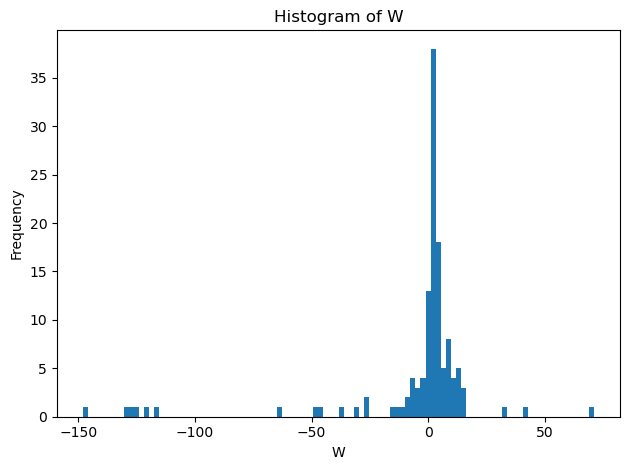

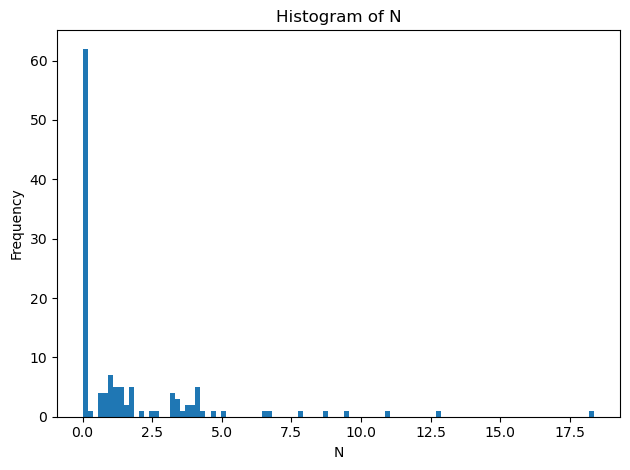

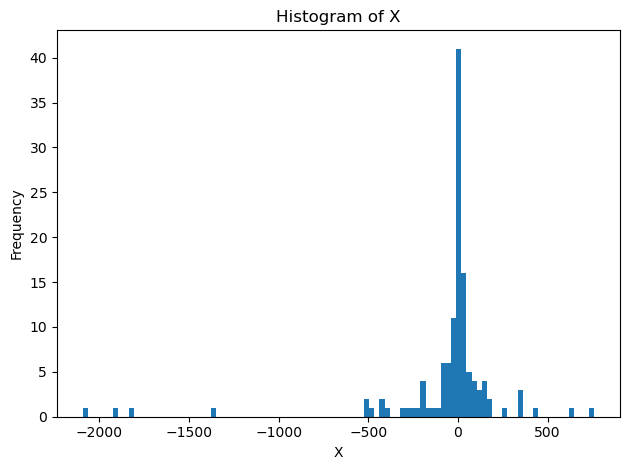

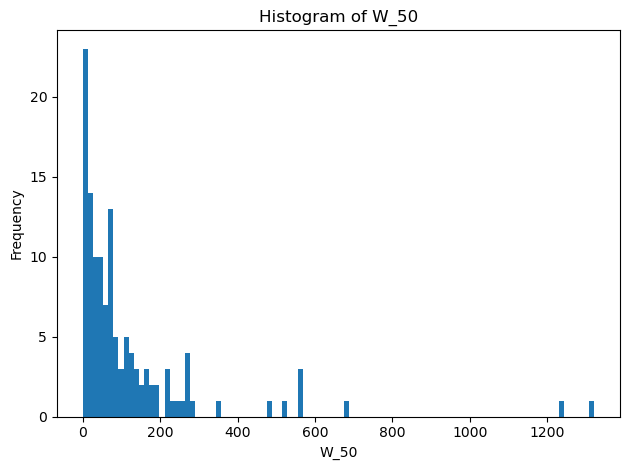

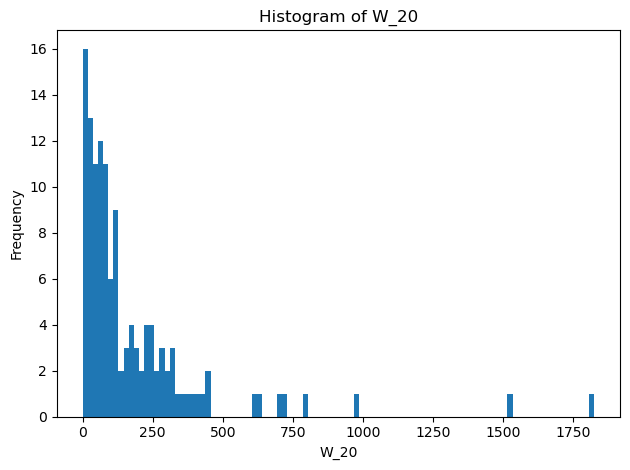

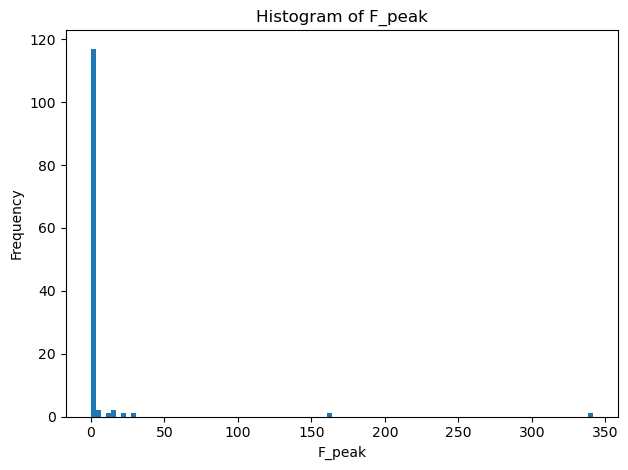

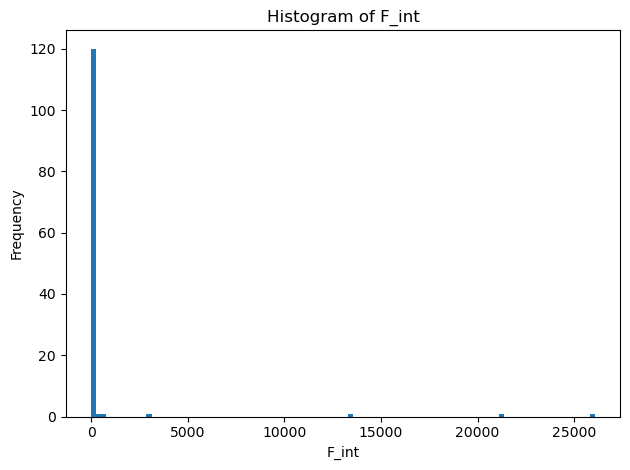

In [4]:
for i in [7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]:
    
    plt.hist(tot_fit.iloc[:,i], bins=100)
    plt.xlabel(tot_fit.columns[i])
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + tot_fit.columns[i])
    plt.tight_layout()
    plt.savefig('./figures_corrected/histogram_of_'+tot_fit.columns[i])
    plt.show()

In [5]:
tot_fit.iloc[:, [0, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]].to_csv('./csv_of_fit_prms_paper_corrected.csv')